In [14]:
import asyncio
import json
import aiohttp
from understat import Understat
from mplsoccer.pitch import VerticalPitch, Pitch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nest_asyncio
nest_asyncio.apply()

In [2]:
async def main():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        player = await understat.get_league_players(
            "epl", 2023,
            player_name="Erling Haaland"
        )
        print(json.dumps(player))

loop = asyncio.get_event_loop()
loop.run_until_complete(main())

[{"id": "8260", "player_name": "Erling Haaland", "games": "13", "time": "1054", "goals": "18", "xG": "12.818229913711548", "assists": "3", "xA": "3.321908339858055", "shots": "52", "key_passes": "14", "yellow_cards": "2", "red_cards": "0", "position": "F S", "team_title": "Manchester City", "npg": "15", "npxG": "10.534723222255707", "xGChain": "11.96795904636383", "xGBuildup": "0.8650823375210166"}]


In [3]:
async def main():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        player = await understat.get_player_shots(8260)
        with open('haaland.JSON', 'w') as f:
            json.dump(player, f, indent=2)
        
loop = asyncio.get_event_loop()
loop.run_until_complete(main())

In [4]:
with open('haaland.JSON', 'r') as f:
    haaland = json.load(f)

In [7]:
haaland_df = pd.DataFrame(haaland)

In [8]:
haaland_df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,354876,58,Goal,0.8880000305175781,0.6659999847412109,0.07933320105075836,Erling Haaland,a,8260,OpenPlay,2019,LeftFoot,12562,Augsburg,Borussia Dortmund,3,5,2020-01-18 14:30:00,Jadon Sancho,Throughball
1,354881,69,Goal,0.98,0.48900001525878906,0.9206209778785706,Erling Haaland,a,8260,OpenPlay,2019,LeftFoot,12562,Augsburg,Borussia Dortmund,3,5,2020-01-18 14:30:00,Thorgan Hazard,Pass
2,354883,78,Goal,0.8830000305175781,0.34700000762939454,0.3228312134742737,Erling Haaland,a,8260,OpenPlay,2019,LeftFoot,12562,Augsburg,Borussia Dortmund,3,5,2020-01-18 14:30:00,Marco Reus,Throughball
3,355527,65,BlockedShot,0.8859999847412109,0.639000015258789,0.1191810667514801,Erling Haaland,h,8260,OpenPlay,2019,LeftFoot,12566,Borussia Dortmund,FC Cologne,5,1,2020-01-24 19:30:00,Jadon Sancho,Pass
4,355531,76,Goal,0.955,0.495,0.746640682220459,Erling Haaland,h,8260,OpenPlay,2019,LeftFoot,12566,Borussia Dortmund,FC Cologne,5,1,2020-01-24 19:30:00,None,Rebound


In [9]:
haaland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               257 non-null    object
 1   minute           257 non-null    object
 2   result           257 non-null    object
 3   X                257 non-null    object
 4   Y                257 non-null    object
 5   xG               257 non-null    object
 6   player           257 non-null    object
 7   h_a              257 non-null    object
 8   player_id        257 non-null    object
 9   situation        257 non-null    object
 10  season           257 non-null    object
 11  shotType         257 non-null    object
 12  match_id         257 non-null    object
 13  h_team           257 non-null    object
 14  a_team           257 non-null    object
 15  h_goals          257 non-null    object
 16  a_goals          257 non-null    object
 17  date             257 non-null    ob

In [10]:
haaland_df['X'] = haaland_df['X'].astype(float)*100
haaland_df['Y'] = haaland_df['Y'].astype(float)*100
haaland_df['xG'] = haaland_df['xG'].astype(float)

In [11]:
haaland_df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,354876,58,Goal,88.800003,66.599998,0.079333,Erling Haaland,a,8260,OpenPlay,2019,LeftFoot,12562,Augsburg,Borussia Dortmund,3,5,2020-01-18 14:30:00,Jadon Sancho,Throughball
1,354881,69,Goal,98.000000,48.900002,0.920621,Erling Haaland,a,8260,OpenPlay,2019,LeftFoot,12562,Augsburg,Borussia Dortmund,3,5,2020-01-18 14:30:00,Thorgan Hazard,Pass
2,354883,78,Goal,88.300003,34.700001,0.322831,Erling Haaland,a,8260,OpenPlay,2019,LeftFoot,12562,Augsburg,Borussia Dortmund,3,5,2020-01-18 14:30:00,Marco Reus,Throughball
3,355527,65,BlockedShot,88.599998,63.900002,0.119181,Erling Haaland,h,8260,OpenPlay,2019,LeftFoot,12566,Borussia Dortmund,FC Cologne,5,1,2020-01-24 19:30:00,Jadon Sancho,Pass
4,355531,76,Goal,95.500000,49.500000,0.746641,Erling Haaland,h,8260,OpenPlay,2019,LeftFoot,12566,Borussia Dortmund,FC Cologne,5,1,2020-01-24 19:30:00,None,Rebound


In [12]:
haaland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               257 non-null    object 
 1   minute           257 non-null    object 
 2   result           257 non-null    object 
 3   X                257 non-null    float64
 4   Y                257 non-null    float64
 5   xG               257 non-null    float64
 6   player           257 non-null    object 
 7   h_a              257 non-null    object 
 8   player_id        257 non-null    object 
 9   situation        257 non-null    object 
 10  season           257 non-null    object 
 11  shotType         257 non-null    object 
 12  match_id         257 non-null    object 
 13  h_team           257 non-null    object 
 14  a_team           257 non-null    object 
 15  h_goals          257 non-null    object 
 16  a_goals          257 non-null    object 
 17  date            

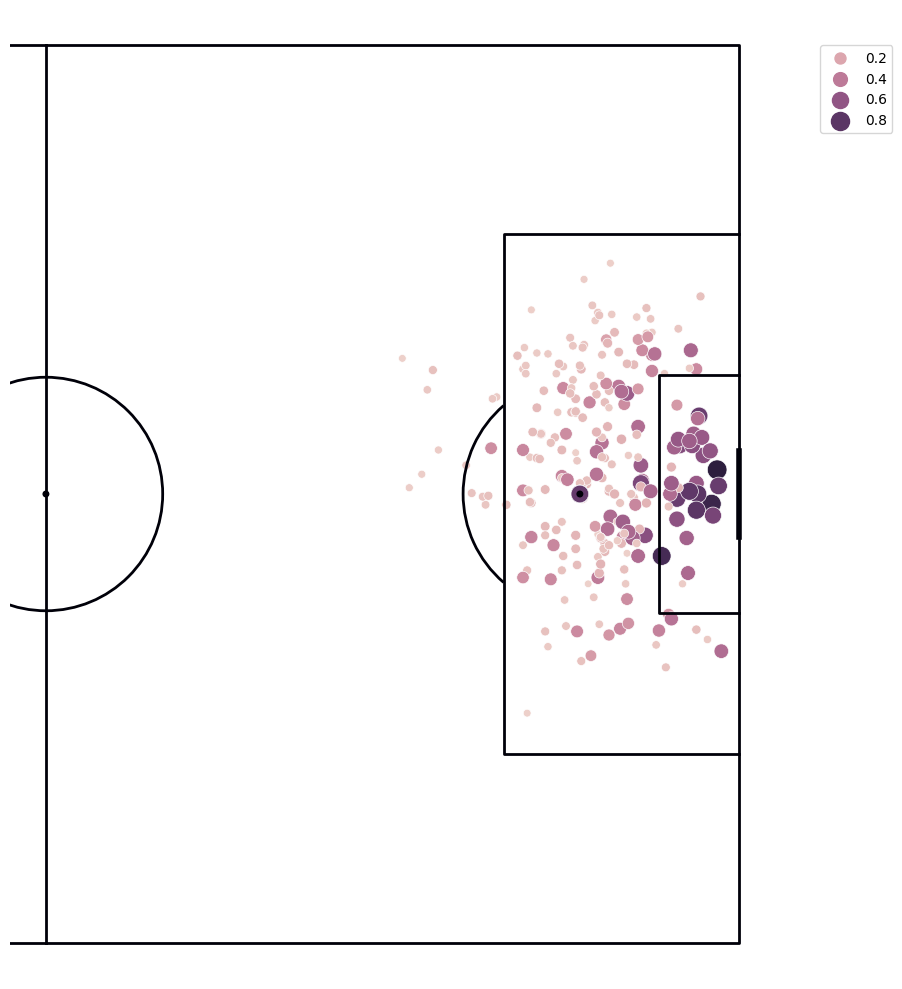

In [15]:
pitch = Pitch(pitch_type='opta', line_color='#000009', line_zorder=2, pitch_color='white', half=True)
fig, ax = pitch.draw(figsize=(15, 10))
sns.scatterplot(data=haaland_df, x='X', y='Y', ax=ax, hue='xG', size='xG', sizes=(30, 200))
plt.legend(bbox_to_anchor=(1.05, 0.97), loc=2);